## Convolutional Neural Network for MNIST Classification

In [16]:
import numpy as np

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils

import keras
from keras.datasets import mnist

### Loading the dataset

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Display the Dataset

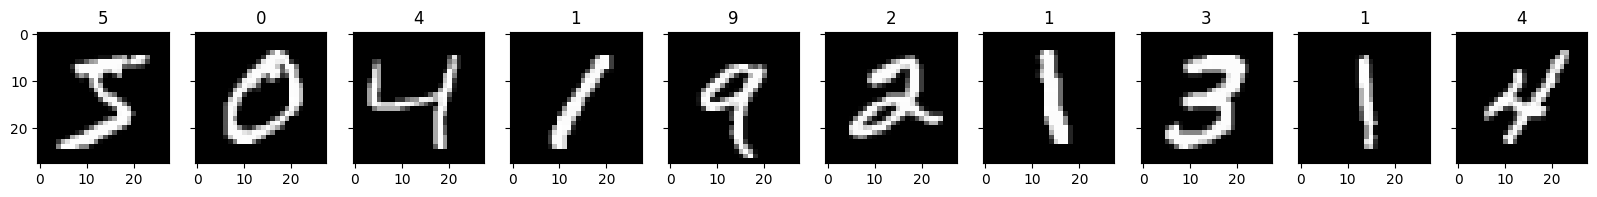

In [10]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()

### Normalize the images to the range [0, 1]

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Reshape the images to include a channel dimension (28, 28, 1)


In [13]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

### Convert the labels to one-hot encoding using the to_categorical function

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

### Building the CNN Model Architecture

In [17]:
# Building the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(128, activation='relu'))

# 2nd Fully Connected Layer
model.add(Dense(50, activation='relu'))

# 3rd Fully Connected Layer
model.add(Dense(50, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model and evaluating its accuracy

In [19]:
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 199ms/step - accuracy: 0.1669 - loss: 2.1765 - val_accuracy: 0.5771 - val_loss: 1.1253
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 186ms/step - accuracy: 0.6716 - loss: 0.9120 - val_accuracy: 0.8307 - val_loss: 0.5002
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.8473 - loss: 0.4624 - val_accuracy: 0.9093 - val_loss: 0.2911
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 188ms/step - accuracy: 0.9113 - loss: 0.2840 - val_accuracy: 0.9352 - val_loss: 0.2117
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 197ms/step - accuracy: 0.9327 - loss: 0.2138 - val_accuracy: 0.9498 - val_loss: 0.1747
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 198ms/step - accuracy: 0.9459 - loss: 0.1693 - val_accuracy: 0.9542 - val_loss: 0.1463
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 194ms/step - accuracy: 0.9556 - loss: 0.1414 - val_accuracy: 0.9607 - val_loss: 0.1364
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.9605 - loss: 0

### Plotting the graph to see the loss and accuracy curve of the model

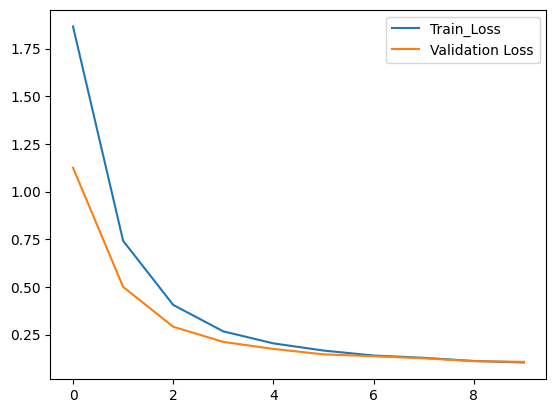

In [24]:
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

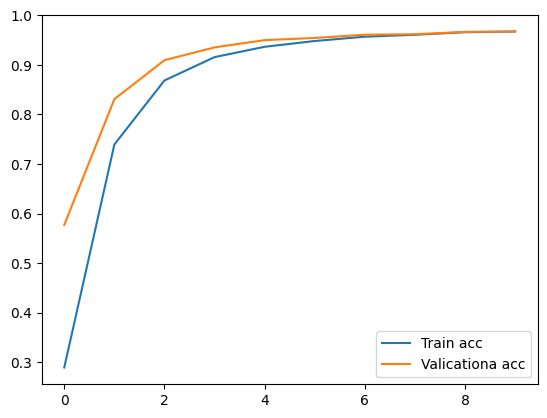

In [25]:
plt.plot(history.history['accuracy'],label='Train acc')
plt.plot(history.history['val_accuracy'],label='Valicationa acc')
plt.legend()

In [26]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
